# First generate the training data. Lets "play" some BlackJack...

In [22]:
import numpy as np
import matplotlib.pyplot as plt

In [23]:
def pick_card():
    cards = [2,3] #How many cards can be picked?
    res = 0
    for i in range(np.random.choice(cards)):
        res += np.random.choice([2,3,4,5,6,7,8,9,10,10,10,11])
    return res

In [24]:
def make_game_results(number_of_games=1):
    outcomes = []
    gamer_values = []
    for _ in range(number_of_games):
        res = [0,0,0,0]
        player, bank = pick_card(), pick_card()
        if player <=21 and player > bank: res[0] = 1
        if bank <=21 and bank >= player: res[1] = 1
        if player > 21: res[2] = 1
        if bank > 21: res[3] = 1
        gamer_values.append([player,bank])
        outcomes.append(res)
    return np.array(gamer_values),np.array(outcomes)

In [25]:
values = {0:'Player wins',1:'Bank wins',2:'Player BUSTED',3:'Bank BUSTED'}

In [26]:
games = 50000
X_data,y_label = make_game_results(games)

# Now Split the data into training and testing

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_data,y_label,test_size=0.3)

# Next, build the model using Keras as TensorFlow-Wrapper

In [29]:
from keras.models import Sequential
from keras.layers import Dense

In [30]:
model = Sequential()

In [31]:
model.add(Dense(100,input_dim=2,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(4,activation='softmax'))

In [32]:
model.compile(loss='MSLE',optimizer='adam',metrics=['accuracy'])

In [33]:
history = model.fit(X_train,y_train,epochs=10,batch_size=32,validation_split=0.33, verbose=0)

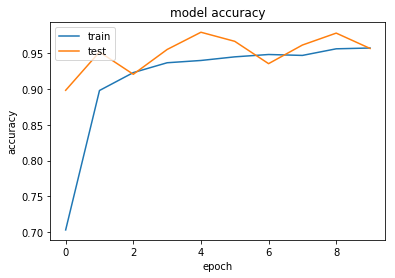

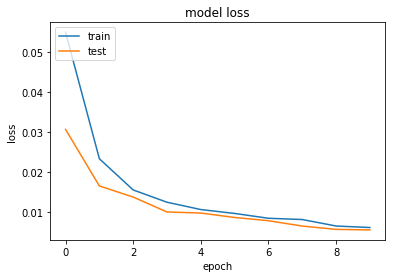

In [34]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# After training evaluate the test-set

In [35]:
predictions = model.predict(X_test)

In [36]:
wrong_predictions = predictions.argmax(1) == y_test.argmax(1)

In [37]:
accuracy = wrong_predictions.sum()/len(wrong_predictions)

In [38]:
print('Model accuracy after training: {:.2f}%'.format(accuracy*100))

Model accuracy after training: 96.06%


# Evaluate some hand-crafted game-results

In [39]:
new_games = [[14,15], #Bank wins
            [21,20], #Player wins
            [22,22], #Both are busted
            [19,19], #Bank wins
            [2,2]] #Bank wins

In [40]:
for res in model.predict(np.array(new_games)):
    perc = list(res)
    perc = [str(int(p*10000)/100)+'%' for p in perc]
    print('Confidence: \t',perc)
    print('Game outcome:\t',res.argmax(),values[res.argmax()])
    print('\n')

Confidence: 	 ['0.0%', '99.99%', '0.0%', '0.0%']
Game outcome:	 1 Bank wins


Confidence: 	 ['91.24%', '4.7%', '3.24%', '0.79%']
Game outcome:	 0 Player wins


Confidence: 	 ['0.07%', '27.71%', '28.79%', '43.41%']
Game outcome:	 3 Bank BUSTED


Confidence: 	 ['0.17%', '99.81%', '0.0%', '0.0%']
Game outcome:	 1 Bank wins


Confidence: 	 ['15.29%', '84.7%', '0.0%', '0.0%']
Game outcome:	 1 Bank wins


